In [1]:
import cv2
import numpy as np
import glob
import random
import matplotlib.pyplot as plt
from easyocr import Reader
import pytesseract

/home/ameer/.local/lib/python3.8/site-packages/skimage/io/manage_plugins.py:23: UserWarning: Your installed pillow version is < 7.1.0. Several security issues (CVE-2020-11538, CVE-2020-10379, CVE-2020-10994, CVE-2020-10177) have been fixed in pillow 7.1.0 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper


In [2]:
# Load Yolo
net = cv2.dnn.readNet("yolov3_training_last.weights", "yolov3_testing.cfg")

# Name custom object
classes = ["text"]

# Images path for testing
images_path = glob.glob('test/*.jpg')


In [3]:
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

random.shuffle(images_path)
# loop through all the images


In [4]:
for img_path in images_path:
    # Loading image and resizing
    img = cv2.imread(img_path)
    img = cv2.resize(img, None, fx=0.4, fy=0.4)
    height, width, channels = img.shape
    img1= cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
    # Detecting the text or the box object
    blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

    net.setInput(blob)
    outs = net.forward(output_layers)

    # Showing informations on the screen
    class_ids = []
    confidences = []
    boxes = []
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.3:
                # Object detected
                print(class_id)
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

                # Rectangle coordinates
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

                
                # crop and save 
            
    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
    print(indexes)
    font = cv2.FONT_HERSHEY_PLAIN
    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            color = colors[class_ids[i]]
            cv2.rectangle(img, (x, y), (x + w, y + h), (0,0,255), 2)
            cv2.putText(img, label, (x, y + 30), font, 3, color, 2)
            
    imS = cv2.resize(img, (800, 500)) 
    cv2.imshow("Image", imS)
    key = cv2.waitKey(0)

cv2.destroyAllWindows()

0
0
[[1]]
0
[[0]]
0
0
[[1]]
0
[[0]]
0
0
0
[[2]]
0
0
[[1]]


['3', '6', '4', '\x0c']

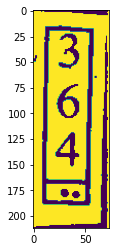

In [8]:
# read image
file_name='cropped3.png'

im1 = cv2.imread(file_name,0)
im = cv2.resize(im1, None, fx=1.8, fy=1.8, interpolation=cv2.INTER_CUBIC)

if (im.shape[1]>im.shape[0]):
     im = cv2.rotate(im, cv2.cv2.ROTATE_90_COUNTERCLOCKWISE)   
        
im = cv2.threshold(im, 100, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY)[1]

#im = cv2.adaptiveThreshold(im,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
#            cv2.THRESH_BINARY,11,2)
# remove vertical threshold 

plt.imshow(im)
# configurations
config = (' --oem 3 --psm 6 outputbase digits')
# pytessercat
text = pytesseract.image_to_string(im, config=config)
# print text
text = text.split('\n')
if (text==['\x0c'] ):
    # read image
    im = cv2.imread(file_name,0)
    im = cv2.resize(im, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_CUBIC)

    if (im.shape[1]>im.shape[0]):
         im = cv2.rotate(im, cv2.cv2.ROTATE_90_COUNTERCLOCKWISE)   
        
    im = cv2.threshold(im, 100, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY)[1]
    # remove vertical threshold 

    plt.imshow(im)
    # configurations
    config = (' --oem 3 --psm 6 outputbase digits')
    # pytessercat
    text = pytesseract.image_to_string(im, config=config)
    # print text
    text = text.split('\n')
  
text      
        
    
    
 

In [9]:
# OCR the input image using EasyOCR
print("[INFO] OCR'ing input image...")
reader = Reader(['en'],gpu=True )# flag for using GPU
results = reader.readtext(im, allowlist ='0123456789')
results

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[INFO] OCR'ing input image...


[([[22, 22], [48, 22], [48, 58], [22, 58]], '3', 0.9999997615814351)]